Do a decision tree and then a forest and compare the results

In [101]:
import pandas as pd
data = pd.read_csv('C:\Data Analyst Projects\Practice Datasets\Customer-Churn-Records.csv')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

As we see here, we have 4 columns that are objects so those will need to be formatted or dropped

In [103]:
data = data.drop(['Surname'], axis=1)
# surname won't have an impact on whether a customer will churn or not, so drop it

In [104]:
data = data.join(pd.get_dummies(data.Gender)).drop(['Gender'], axis=1)

In [105]:
data['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [106]:
data = data.rename(columns={'Card Type': 'Card_Type'})
# use dummies because this column could be important, have to convert it to be useful in the analysis

In [107]:
data = data.join(pd.get_dummies(data.Card_Type)).drop(['Card_Type'], axis=1)

In [108]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [109]:
data = data.join(pd.get_dummies(data.Geography)).drop(['Geography'], axis=1)
# geography could play into what different customers want/need or what their options are

In [110]:
data = data.drop(['RowNumber'], axis=1)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Female              10000 non-null  bool   
 14  Male                10000 non-null  bool   
 15  DIAMOND             10000 non-null  bool   
 16  GOLD 

Now we have all the data formatted to my liking and am ready to begin the modeling

In [112]:
from sklearn.model_selection import train_test_split

X = data.drop(['Exited'], axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [114]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [115]:
y_pred = dtc.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9985


In [117]:
cn = ['Stayed', 'Churned']

[Text(0.4149305555555556, 0.95, 'Complain <= 0.736\ngini = 0.324\nsamples = 8000\nvalue = [6376, 1624]\nclass = Stayed'),
 Text(0.13194444444444445, 0.85, 'Point Earned <= -1.873\ngini = 0.001\nsamples = 6371\nvalue = [6367.0, 4.0]\nclass = Stayed'),
 Text(0.05555555555555555, 0.75, 'NumOfProducts <= -0.06\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Stayed'),
 Text(0.027777777777777776, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Churned'),
 Text(0.08333333333333333, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Stayed'),
 Text(0.20833333333333334, 0.75, 'Balance <= 2.187\ngini = 0.001\nsamples = 6369\nvalue = [6366, 3]\nclass = Stayed'),
 Text(0.1388888888888889, 0.65, 'EstimatedSalary <= 1.601\ngini = 0.001\nsamples = 6366\nvalue = [6364, 2]\nclass = Stayed'),
 Text(0.08333333333333333, 0.55, 'CustomerId <= -1.081\ngini = 0.0\nsamples = 6097\nvalue = [6096.0, 1.0]\nclass = Stayed'),
 Text(0.05555555555555555, 0.45, 'CustomerId <= -1.082\ngini = 0.002\nsamp

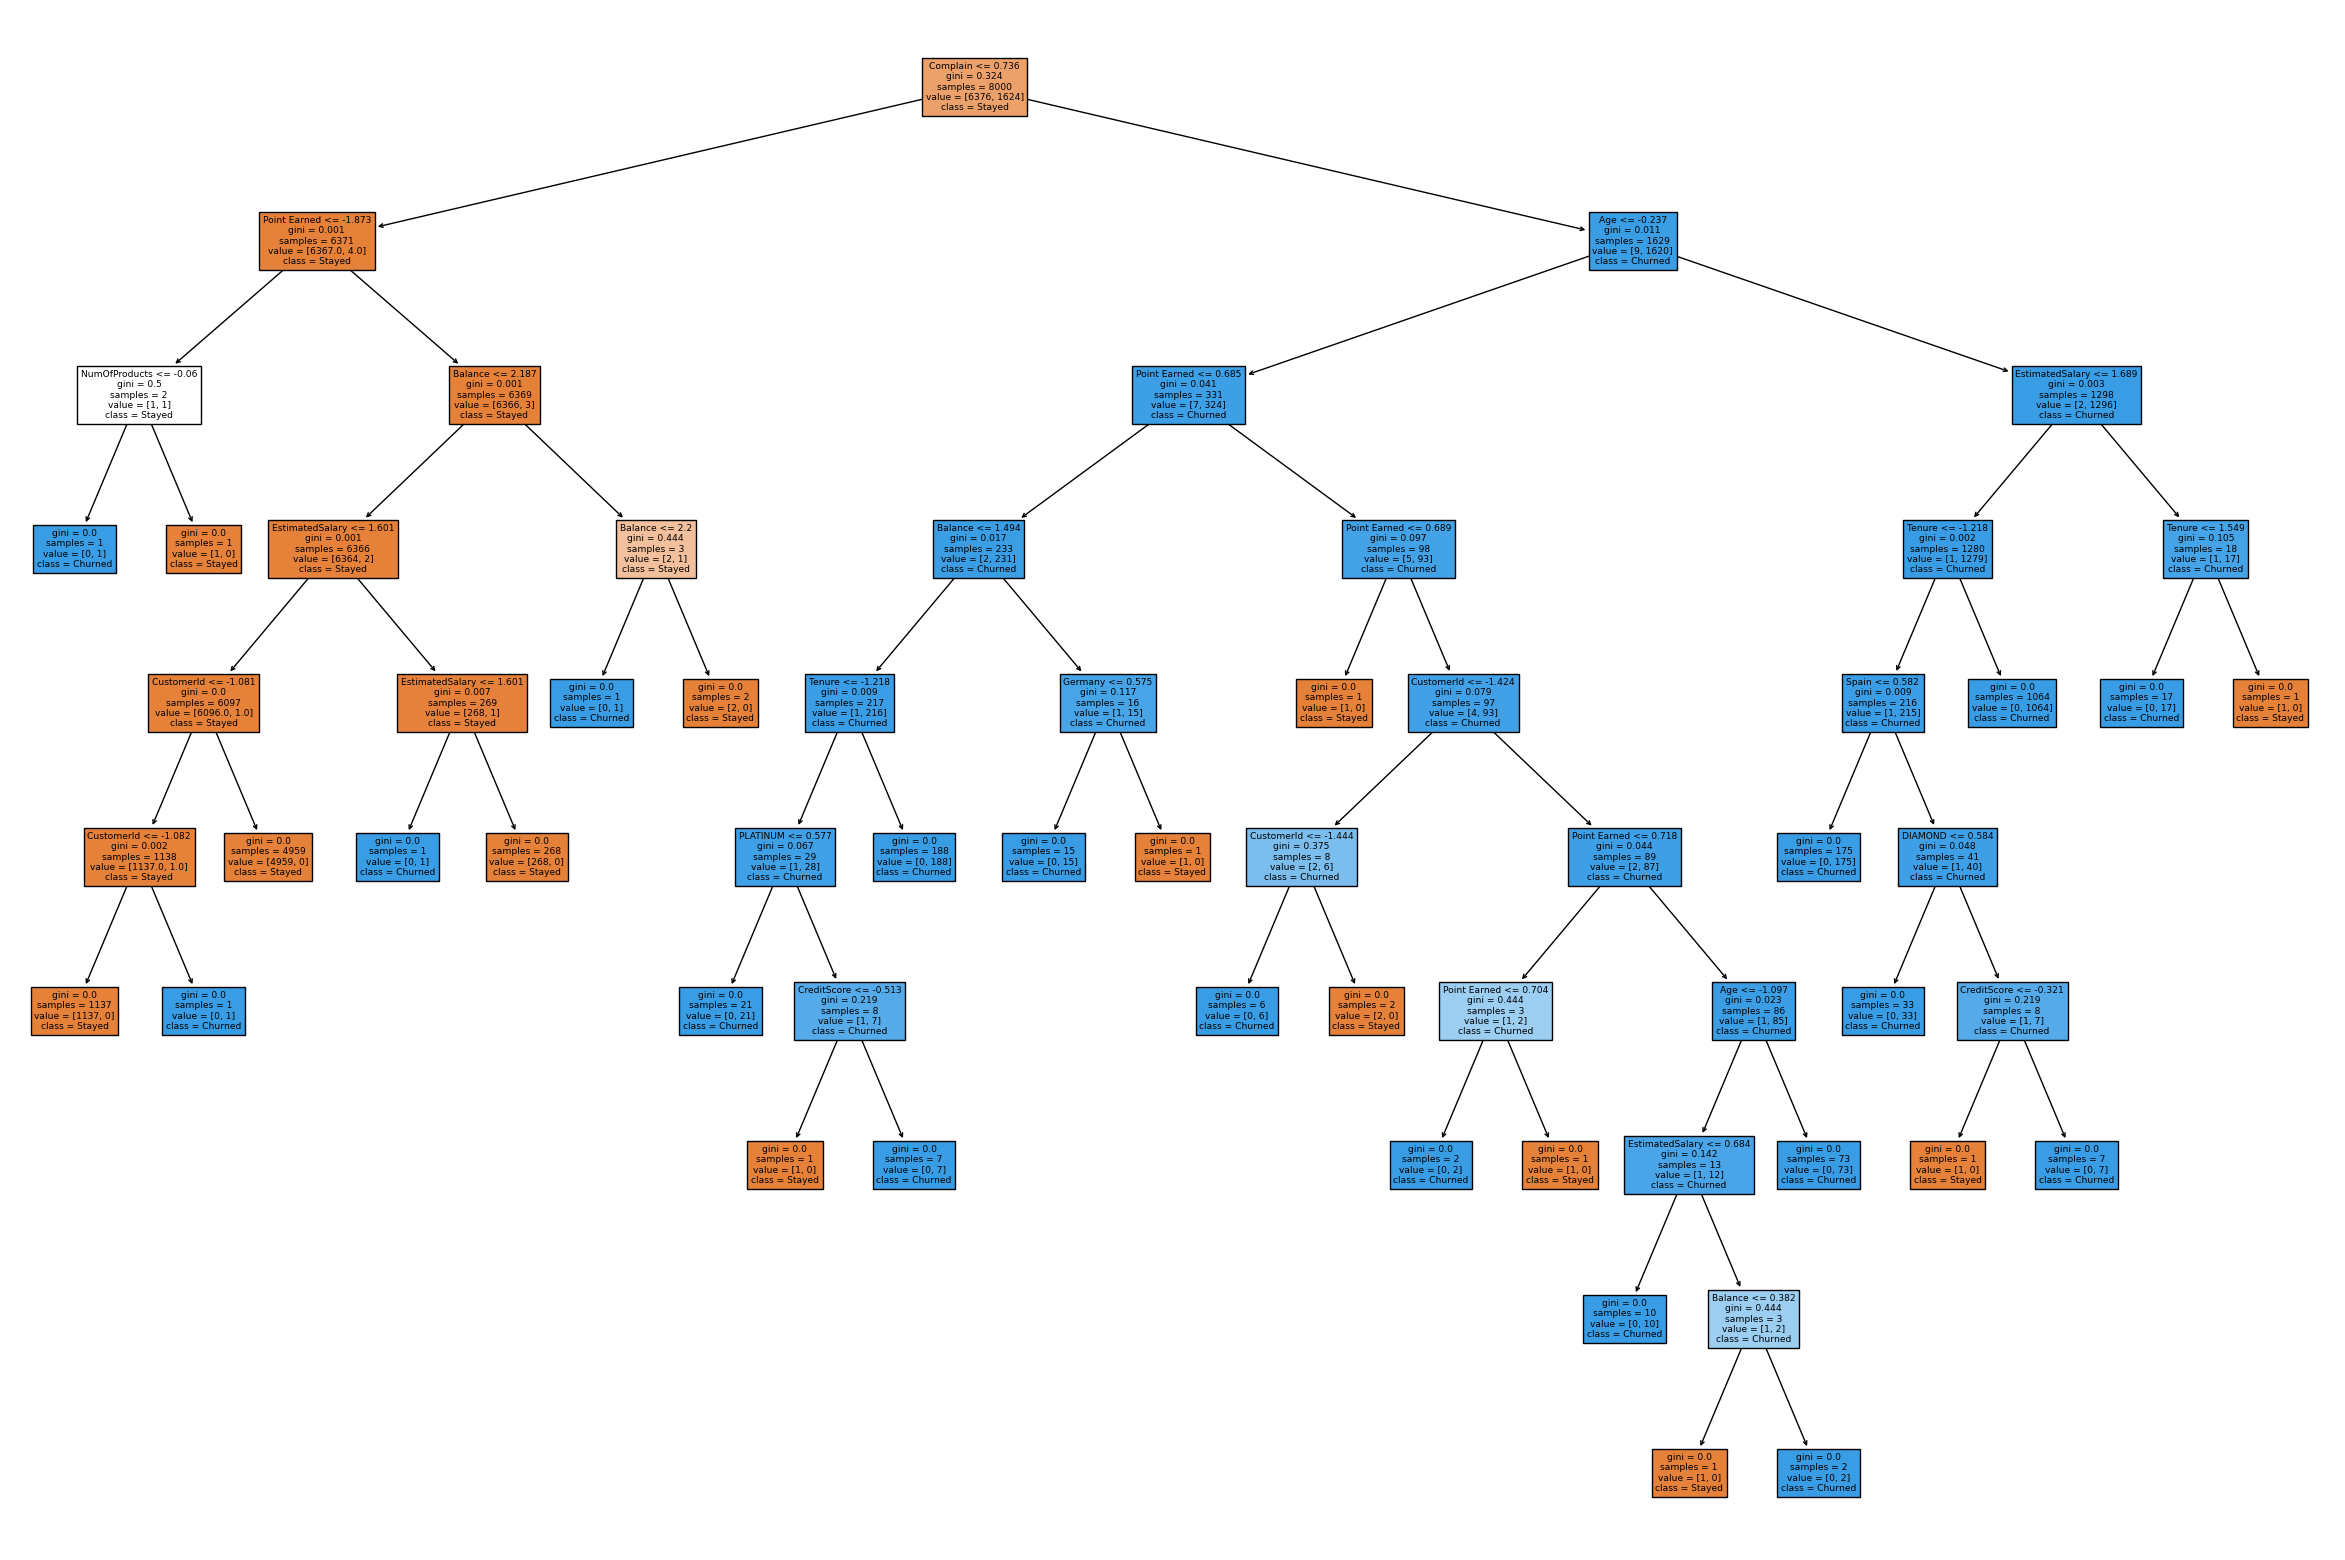

In [118]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(dtc, feature_names=X.columns, class_names=cn, filled=True)

In [122]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
y2_pred = rfc.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9985


For this example, the random forest and the single tree don't have any difference in score, this could be due to the dataset not being completely random considering the percentage is so high